Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.78
Confusion Matrix:
[[157  63]
 [ 34 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       220
           1       0.75      0.85      0.79       220

    accuracy                           0.78       440
   macro avg       0.78      0.78      0.78       440
weighted avg       0.78      0.78      0.78       440



C:\Users\Akhil Jayadeep\AppData\Local\Temp\ipykernel_24316\1881377593.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_in_top_ten'] = model.predict(X_test)
C:\Users\Akhil Jayadeep\AppData\Local\Temp\ipykernel_24316\1881377593.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_in_top_ten'] = test_data['predicted_in_top_ten'].apply(lambda x: 1 if x > 0.5 else 0)


<AxesSubplot: >

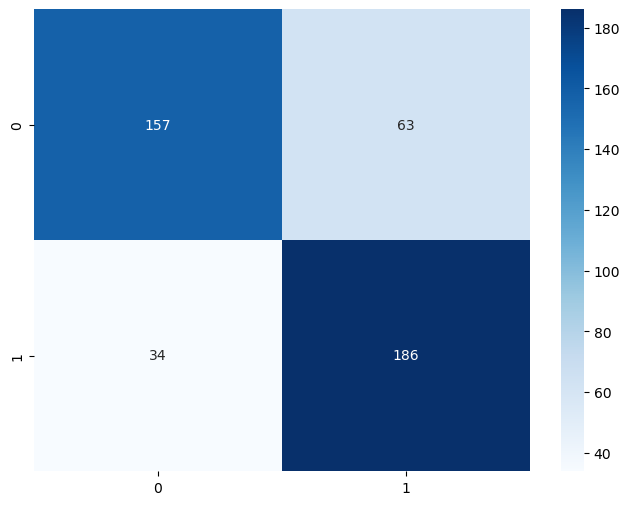

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('merge8.csv')

#  training and testing sets
train_data = data[data['year'] < 2021]
test_data = data[data['year'] == 2021]

features = ['year', 'round', 'weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy', 'cum_wins', 'grid', 'driver_age', 'home_race', 'points_before_race']
target = 'in_top_ten'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# hyperparameters and their values for grid search
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# random forest classifier and perform grid search cv
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_

# Training with the best hyperparameters
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Round the predictions to 0 or 1 based on threshold
y_pred_rounded = [1 if pred > 0.5 else 0 for pred in y_pred]

# add a new column 'predicted_in_top_ten' to the original dataframe
test_data['predicted_in_top_ten'] = model.predict(X_test)
test_data['predicted_in_top_ten'] = test_data['predicted_in_top_ten'].apply(lambda x: 1 if x > 0.5 else 0)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_rounded)
cm = confusion_matrix(y_test, y_pred_rounded)
report = classification_report(y_test, y_pred_rounded)

print(f"Best hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)
# Create heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', ax=ax)


In [2]:
test_data.head()

,raceId,resultId,driverId,constructorId,year,round,name_mer3,nationality,circuitRef,driverRef,...,championship_pos,cum_wins,status,driver_age,home_race,points_before_race,wins,in_top_ten,in_top_three,predicted_in_top_ten
7907,1052,24966,1,131,2021,1,Bahrain Grand Prix,British,bahrain,hamilton,...,1.0,1.0,Finished,36.2,0,0.0,1,1,1,1
7908,1052,24967,830,9,2021,1,Bahrain Grand Prix,Dutch,bahrain,max_verstappen,...,2.0,0.0,Finished,23.5,0,0.0,0,1,1,1
7909,1052,24968,822,131,2021,1,Bahrain Grand Prix,Finnish,bahrain,bottas,...,3.0,0.0,Finished,31.6,0,0.0,0,1,1,1
7910,1052,24969,846,1,2021,1,Bahrain Grand Prix,British,bahrain,norris,...,4.0,0.0,Finished,21.4,0,0.0,0,1,0,1
7911,1052,24970,815,9,2021,1,Bahrain Grand Prix,Mexican,bahrain,perez,...,5.0,0.0,Finished,31.2,0,0.0,0,1,0,0


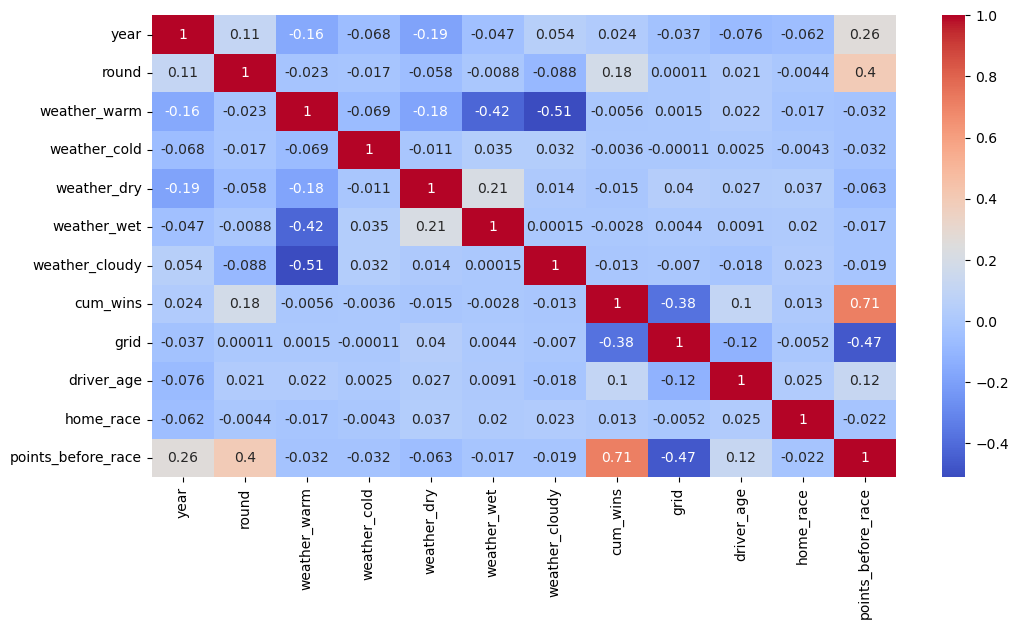

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('merge8.csv')
corr_matrix = data[features].corr()
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 10}, ax=ax)

plt.show()


In [26]:
test_data.to_csv('predtest.csv', index=False)